In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
from sklearn.datasets import make_blobs

# Generating data

In [33]:
Xb, yb = make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 42)

In [34]:
Xb

array([[-3.22795898e+00,  8.73579766e+00],
       [ 6.26445570e+00,  3.55387276e+00],
       [-3.32577171e+00,  9.18067001e+00],
       [ 5.87296908e+00,  4.81835916e+00],
       [ 4.98106874e+00,  3.93388382e+00],
       [-1.96710421e+00,  1.13213410e+01],
       [ 5.05491504e+00,  3.21394456e+00],
       [ 2.31388369e+00,  2.07601415e+00],
       [-3.09735985e+00,  6.81901371e+00],
       [-3.76802391e+00,  8.55046756e+00],
       [-2.40790532e+00,  6.87716385e+00],
       [ 2.78445277e+00, -7.51523569e-03],
       [-3.21340920e+00,  9.82812619e+00],
       [-4.50147670e+00,  9.30957798e+00],
       [ 3.61984175e+00,  2.32155023e+00],
       [ 3.46499890e+00,  1.49007741e+00],
       [ 4.73022415e+00,  5.66803285e+00],
       [ 3.03354009e+00,  2.69687831e+00],
       [ 4.72719191e+00,  2.58714237e-01],
       [-2.37155646e+00,  6.03293276e+00],
       [ 4.96101945e+00,  1.04561516e-01],
       [ 4.35133739e+00,  2.42549070e+00],
       [ 5.82642676e+00,  6.09088502e-01],
       [ 6.

In [35]:
yb

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

# Visualizing the data

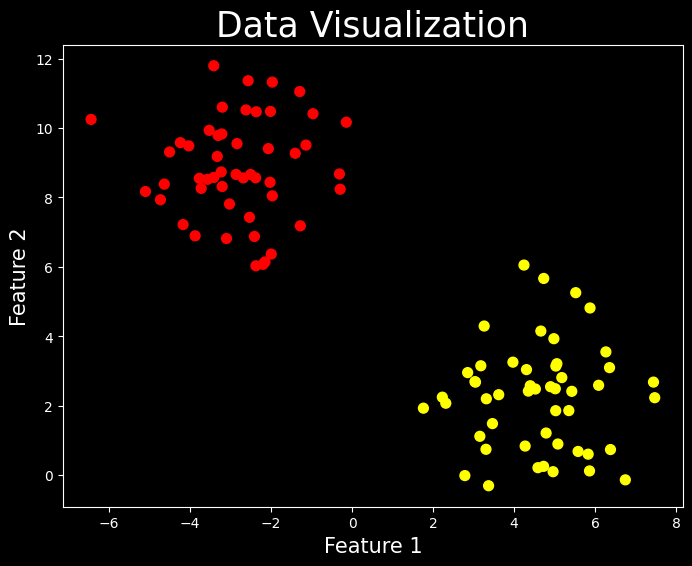

In [36]:
plt.figure(figsize = (8,6))
plt.scatter(Xb[:, 0], Xb[:, 1], c = yb, s = 50, cmap = "autumn" );
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization', fontsize = 25)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.show()

# Draw the best fit line (y = mx + b) to separate the class

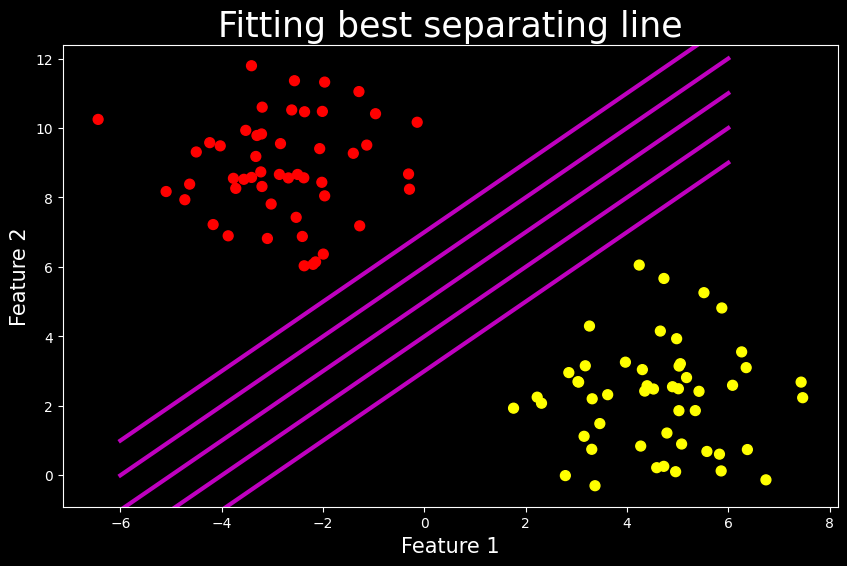

In [37]:
plt.figure(figsize = (10,6))
plt.scatter(Xb[:, 0], Xb[:, 1], c = yb, s = 50, cmap = "autumn" );
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Fitting best separating line', fontsize = 25)
plt.xlim(xlim)
plt.ylim(ylim)

# Fitting best line

x = np.linspace(-6,6)
list = [(1,3),(1,4),(1,5),(1,6), (1,7)]
for m, b in list:
    y = m * x + b
    plt.plot(x, y, 'm', lw =3)


# Importing Support Vector Classifier

In [38]:
from sklearn.svm import SVC
svc = SVC()
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

###  C = Regularization parameter. The strength of the regularization is inversely proportional to C.
### This C is same as K we studied in the theory of SVM. Larger the value of K, Larger will be the margin
###  and the support vectors are farther away from the hyperplane and the margin is hard.

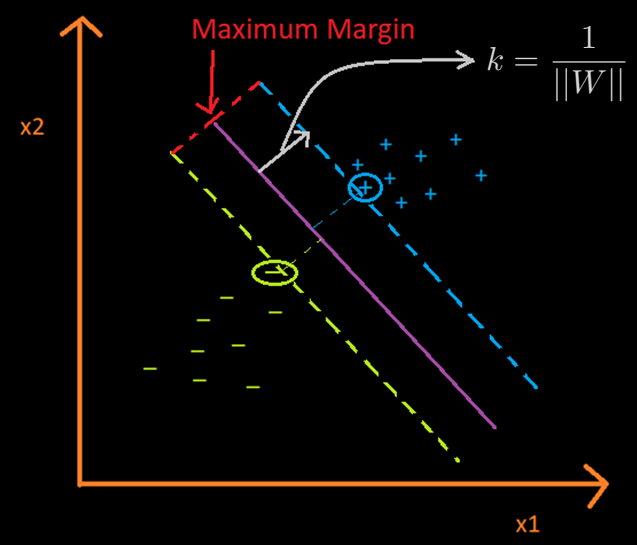

# Applying SVC for large value of C

In [39]:
svc = SVC(kernel = 'linear', C = 1)
svc.fit(Xb, yb)

SVC(C=1, kernel='linear')

# Function to draw hyperplane of Support Vector Classifier

In [ ]:
def draw_svc_hyperplane(svc, features ,labels):

    plt.figure(figsize = (10,6))
    plt.scatter(features[:, 0], features[:, 1], c = labels, s = 50, cmap='autumn')
    plt.xlabel('Feature 1', fontsize = 15)
    plt.ylabel('Feature 2', fontsize = 15)
    plt.title('Support Vectors and Hyperplanes', fontsize = 25)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    i = np.linspace(xlim[0], xlim[1], 50)
    j = np.linspace(ylim[0], ylim[1], 50)
    jj, ii = np.meshgrid(j, i)
    ij = np.vstack([ii.ravel(), jj.ravel()]).T
    kk = svc.decision_function(ij).reshape(ii.shape)

    ax.contour(ii, jj, kk, colors =['r','m','y'], levels = [-1, 0, 1], alpha = 1, linestyles=['--', '-', '--'], linewidths = 3)
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 200, lw = 5, edgecolors = 'g')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Observing Support Vectors and Hyperplane

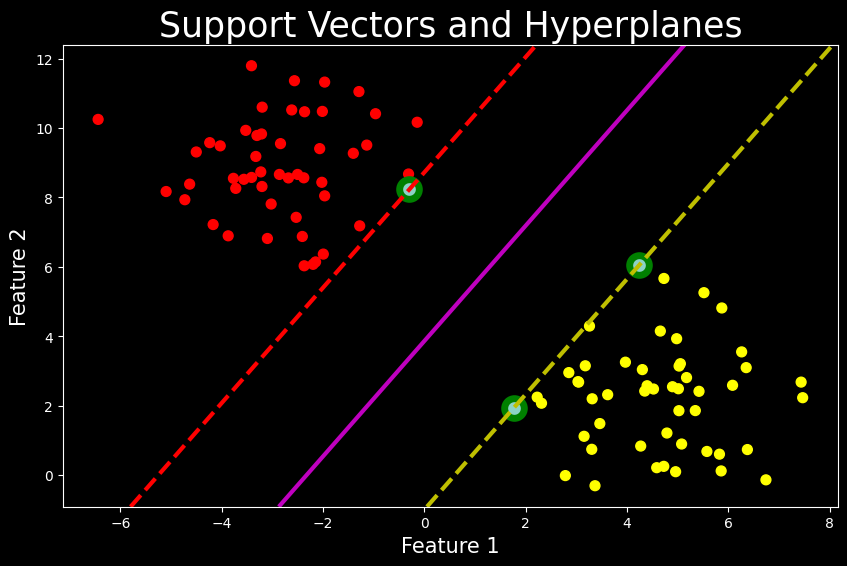

In [40]:
draw_svc_hyperplane(svc, Xb, yb)

In [41]:
svc.support_vectors_

array([[-0.29235656,  8.2368808 ],
       [ 4.24289359,  6.05342343],
       [ 1.76172201,  1.93339887]])

# Applying SVC for small value of C

In [42]:
svc = SVC(kernel = 'linear', C = 0.01)
svc.fit(Xb, yb)

SVC(C=0.01, kernel='linear')

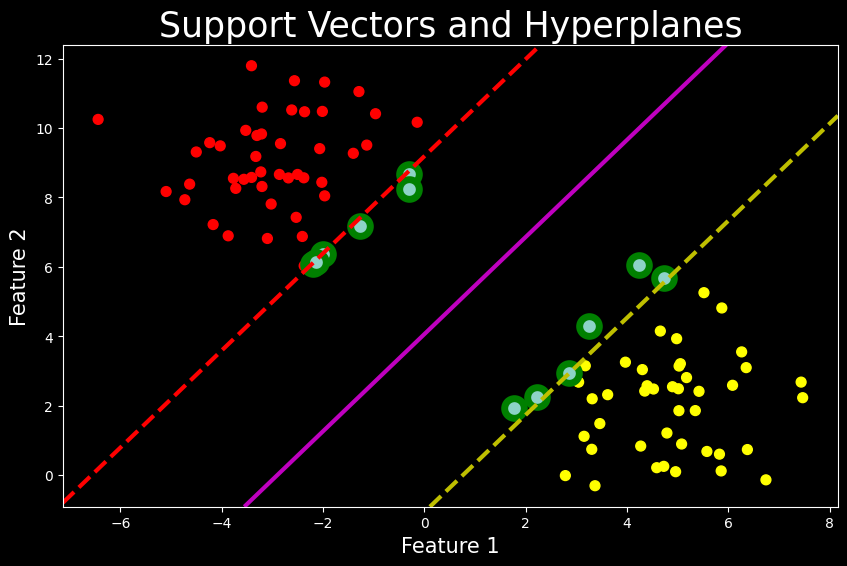

In [43]:
draw_svc_hyperplane(svc, Xb, yb)

In [44]:
svc.support_vectors_

array([[-0.31072447,  8.67562168],
       [-1.99377019,  6.3697259 ],
       [-2.19590223,  6.07478094],
       [-0.29235656,  8.2368808 ],
       [-2.14625422,  6.14436576],
       [-1.27538025,  7.18302065],
       [ 4.73022415,  5.66803285],
       [ 4.24289359,  6.05342343],
       [ 2.85292359,  2.9580001 ],
       [ 1.76172201,  1.93339887],
       [ 2.22865398,  2.25012047],
       [ 3.26074248,  4.29807129]])

## Kernel SVM ( kernel = ' rbf ', gamma = ' scale ' ). We will explore gamma function when the kernel is "rbf". gamma defines how much influence each training sample has.

In [45]:
k_svc = SVC(kernel = 'rbf', C = 1, gamma = 'scale')

In [46]:
k_svc.fit(Xb, yb)

SVC(C=1)

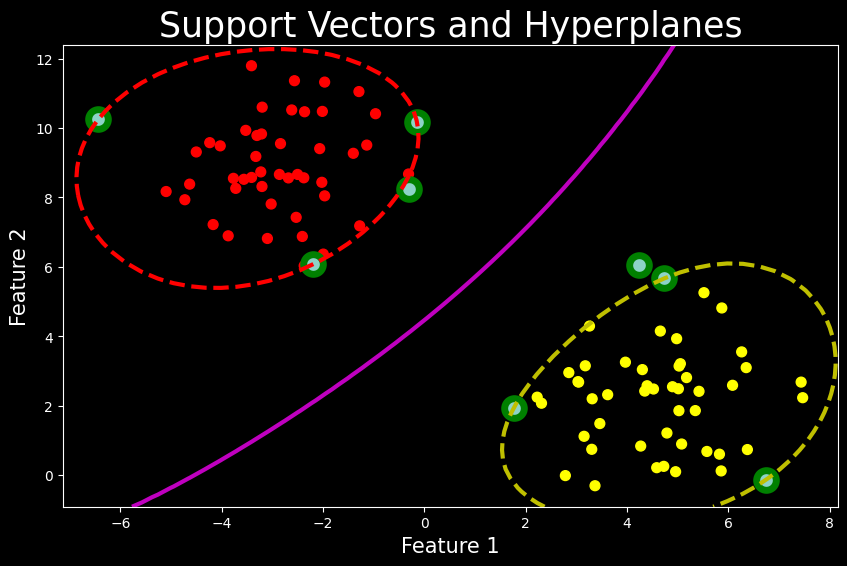

In [47]:
draw_svc_hyperplane(k_svc, Xb, yb)

# Kernel SVM ( kernel = ' rbf ', gamma = ' auto ' )

In [48]:
k_svc = SVC(kernel = 'rbf', C = 1, gamma = 'auto') # When gamma = auto. It tries to learn the noise of the data
                                                   # and enter into the overfitting.

In [49]:
k_svc.fit(Xb, yb)

SVC(C=1, gamma='auto')

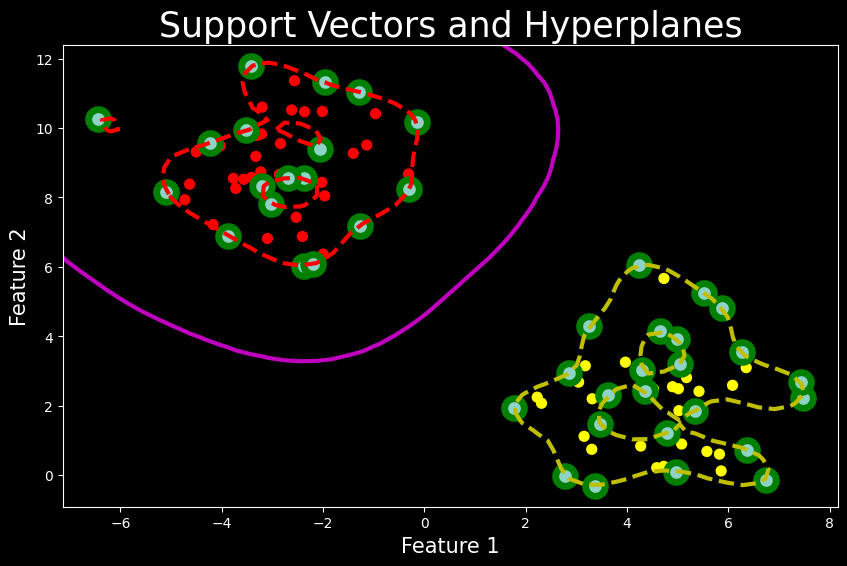

In [50]:
draw_svc_hyperplane(k_svc, Xb, yb)

# If the data is not Linearly separable

In [60]:
from sklearn.datasets import make_circles
Xc, yc = make_circles(100, factor = 0.1, noise = 0.05, random_state = 42)

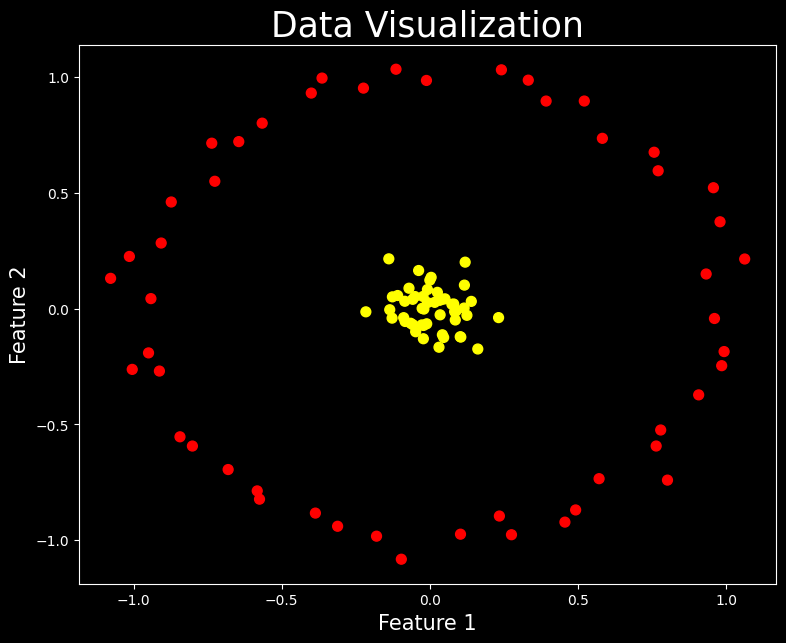

In [61]:
plt.figure(figsize = (9,7))
plt.scatter(Xc[:, 0], Xc[:, 1], c = yc, s = 50, cmap = "autumn" );
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.title('Data Visualization', fontsize = 25)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.show()

In [62]:
clf = SVC(kernel='rbf', C = 5)
clf.fit(Xc, yc)

SVC(C=5)

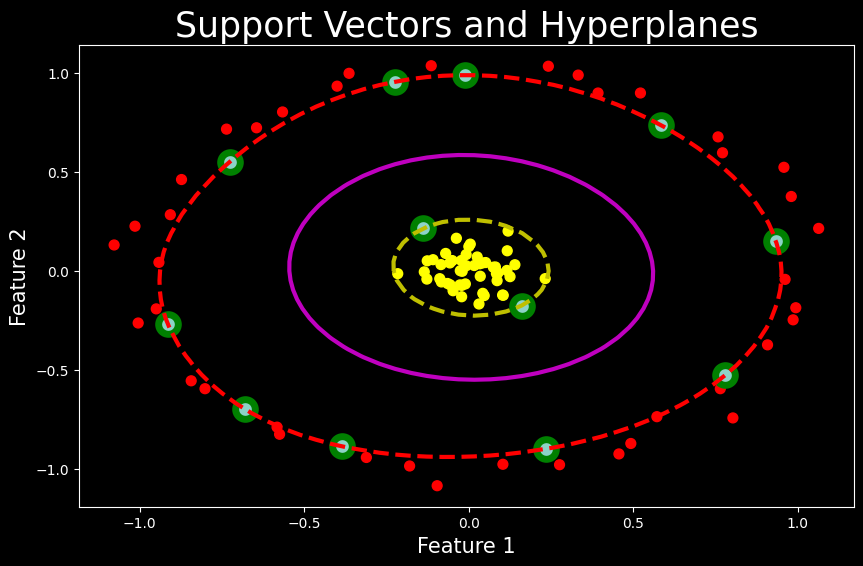

In [63]:
draw_svc_hyperplane(clf, Xc, yc)

In [64]:
clf.support_vectors_

array([[ 0.23488158, -0.89596143],
       [-0.01133069,  0.98658435],
       [-0.68083656, -0.69503173],
       [-0.91287535, -0.26939599],
       [-0.38629565, -0.88325258],
       [ 0.58258637,  0.73639816],
       [ 0.77948787, -0.52412155],
       [ 0.93295142,  0.15008302],
       [-0.7258285 ,  0.55082343],
       [-0.22401592,  0.95337341],
       [-0.1383944 ,  0.21563788],
       [ 0.16199414, -0.17404689]])